#### merge urls to recipe dataframe

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
from collections import Counter
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import ast
import re
import math

In [2]:
# recipes dataframes
# there is a mismatch in df3_urls and df3_recipes 2430 vs 1022
df1 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df1.csv')
df2 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df2.csv')
df3 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df3.csv')
df4 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df4.csv')
df5 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df5.csv')
df6 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df6.csv')
df7 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df7.csv')
df8 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df8.csv')

In [3]:
# concat the dataframes
df_recipes = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
df_recipes = df_recipes.drop(['Unnamed: 0','id'], axis=1) #drop columns not required

In [4]:
df_recipes=df_recipes.reset_index(drop='index')

In [5]:
# url dataframes
df1_url = pd.read_csv('../ScrapeData/csv_urls/urls_df1.csv')
df2_url = pd.read_csv('../ScrapeData/csv_urls/urls_df2.csv')
df3_url = pd.read_csv('../ScrapeData/csv_urls/urls_df3.csv')
df3_url = df3_url.iloc[:1022,:]
df4_url = pd.read_csv('../ScrapeData/csv_urls/urls_df4.csv')
df5_url = pd.read_csv('../ScrapeData/csv_urls/urls_df5.csv')
df6_url = pd.read_csv('../ScrapeData/csv_urls/urls_df6.csv')

In [6]:
# concat the dataframes url and recipes
df_url = pd.concat([df1_url,df2_url, df3_url, df4_url,df5_url,df6_url])
df_url = df_url.drop(['Unnamed: 0'], axis=1) #drop columns not required

In [7]:
df_url = df_url.reset_index(drop='index')

In [8]:
# merge df_url and df_recipes
df = pd.concat([df_url,df_recipes],axis=1)

In [9]:
df = df.reset_index(drop='index')

In [10]:
df.tail()

,batch,urls,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title
11519,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,NaN,"['1 medium white onion, quartered', '3 lb ripe...",94%,Preheat oven to 400°F.Arrange 2 onion quarters...,3.0,16.0,"['Mexican', 'Condiment/Spread', 'Food Processo...",Salsa Ranchera
11520,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,NaN,"['2 cups sugar', '1 cup canola oil', '4 large ...",93%,Position rack in center of oven and preheat to...,4.0,107.0,"['American', 'Cake', 'Mixer', 'Ginger', 'Desse...",Old-Fashioned Carrot Cake with Maple-cream Che...
11521,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/560ea103f...,"['1 cup soy sauce', '1/2 cupmirin (sweet Japan...",90%,Combine first 7 ingredients in medium bowl; wh...,3.5,66.0,"['Asian', 'Beef', 'Beef Rib', 'Summer', 'Grill...",Grilled Korean-Style Short Ribs
11522,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/560ea7ebf...,['4 cups frozen sliced peaches (about 13/4 pou...,71%,"Preheat oven to 375°F. Combine peaches, sugar,...",2.5,17.0,"['American', 'Fruit', 'Dessert', 'Bake', 'Peac...",Peaches with Shortcake Topping
11523,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,NaN,"['1/4 cup olive oil', '2 cups chopped onions',...",89%,Heat olive oil in heavy large skillet over med...,3.0,27.0,"['Cheese', 'Pasta', 'Tomato', 'Sauté', 'Vegeta...","Pasta with Tomatoes, Artichokes, and Feta Cheese"


#### preprocess the dataframe

In [11]:
df['makeitagainscore'] = pd.to_numeric(df['makeitagainscore'].str.replace('%', ''))

In [12]:
# drop rows if there are null value records
df = df.dropna(axis=0, how='any',subset=['bestrating','ingredients',\
                            'makeitagainscore','preparation','rating','reviews','tags','title'])

In [13]:
df = df.reset_index(drop='index')

In [14]:
df.tail()

,batch,urls,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title
11489,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,NaN,"['1 medium white onion, quartered', '3 lb ripe...",94.0,Preheat oven to 400°F.Arrange 2 onion quarters...,3.0,16.0,"['Mexican', 'Condiment/Spread', 'Food Processo...",Salsa Ranchera
11490,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,NaN,"['2 cups sugar', '1 cup canola oil', '4 large ...",93.0,Position rack in center of oven and preheat to...,4.0,107.0,"['American', 'Cake', 'Mixer', 'Ginger', 'Desse...",Old-Fashioned Carrot Cake with Maple-cream Che...
11491,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/560ea103f...,"['1 cup soy sauce', '1/2 cupmirin (sweet Japan...",90.0,Combine first 7 ingredients in medium bowl; wh...,3.5,66.0,"['Asian', 'Beef', 'Beef Rib', 'Summer', 'Grill...",Grilled Korean-Style Short Ribs
11492,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/560ea7ebf...,['4 cups frozen sliced peaches (about 13/4 pou...,71.0,"Preheat oven to 375°F. Combine peaches, sugar,...",2.5,17.0,"['American', 'Fruit', 'Dessert', 'Bake', 'Peac...",Peaches with Shortcake Topping
11493,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,NaN,"['1/4 cup olive oil', '2 cups chopped onions',...",89.0,Heat olive oil in heavy large skillet over med...,3.0,27.0,"['Cheese', 'Pasta', 'Tomato', 'Sauté', 'Vegeta...","Pasta with Tomatoes, Artichokes, and Feta Cheese"


In [15]:
df["ingredients_refined"] = ""
for index, row in df.iterrows():
    ingredients_items = ast.literal_eval(row["ingredients"])
    df.set_value(index,'ingredients_refined',ingredients_items)

In [16]:
df["tags_refined"] = ""
for index, row in df.iterrows():
    tag_items = ast.literal_eval(row["tags"])
    df.set_value(index,'tags_refined',tag_items)

#### extract ingrediants

In [17]:
prepositions = ["A", "An", "a", "about", "above", "above", "across", "additional","after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "plus", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thick", "thickly", "thin", "thinly", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]

In [18]:
# Common measurement words and hard-coded words.
measurement_words = ['pound',
 'cubes',"Fresh",
  'cups',
  'cut',
 'kilogram',
 'ounce','-ounce','ounces',
 'gram','large',
 'cup','ground',
 'spoon','trimmed',
 'quart',
 'teaspoon','teaspoons',
 'smidgen','chopped',
 'drop','medium', 'small',
 'gallon',
 'dash',
 'handful',
 'scoop',
 'bowl',
 'inch',
 '-inch','freshly', 'bunch',
 'pinch','finely',
 'liter',
 'milliliter',
 'tablespoon', 'tablespoons',
 'fluid',
 'bottle','stems', 'removed',
 'tad','Instant',
 'pint', 'Tbsp', 'tsp','lb', '-oz', 'oz','sliced','diced','Pot', 'pot','-','-pound']

In [19]:
# create a list of stopwords, prepositions, and measurement words
filtered = nltk.corpus.stopwords.words('english')
for word in prepositions:
    filtered.append(word)
for word in measurement_words:
    filtered.append(word)

In [20]:
df["ingredient_list"] = ""
for index, row in df.iterrows():
    ingredients_items = ast.literal_eval(row["ingredients"])

    ingredients = []
    pattern = "([^\d\\.\\,\\\;\\*\\]\\[\\%\\½\\<\\>\\:\\°\\?\\�\\}\\{\)\(\"\/\s]+)"
    for ingredient in ingredients_items:
        p = re.compile(pattern)
        result = p.findall(ingredient) 
        ingredients.append(result)
        
        
    single_ingr = sum(ingredients, [])
    recipe_ingr = list(set(single_ingr))


    filtered_ingr = []
    for item in recipe_ingr:
        if item not in filtered:
            filtered_ingr.append(item)
    df.set_value(index,"ingredient_list",filtered_ingr)

In [21]:
df["ingredients_string"] = df["ingredient_list"].map(lambda x: ",".join(x))

In [22]:
df.head()

,batch,urls,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,ingredients_refined,tags_refined,ingredient_list,ingredients_string
0,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/56df1d8cb...,"['2 cups whole-wheat flour', '2 cups all-purpo...",90.0,Put oven rack in middle position and preheat o...,3.5,50.0,"['Irish', 'Bread', 'Bake', 'Vegetarian', 'Quic...",Irish Brown Bread,"[2 cups whole-wheat flour, 2 cups all-purpose ...","[Irish, Bread, Bake, Vegetarian, Quick & Easy,...","[well-shaken, wheat, unsalted, salt, germ, but...","well-shaken,wheat,unsalted,salt,germ,buttermil..."
1,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a78b5919...,"['1 Tbsp. crushed red pepper flakes', '1 Tbsp....",91.0,"Coarsely grind red pepper flakes, peppercorns,...",3.0,11.0,"['Pepper', 'Fennel', 'Pork', 'Garlic', 'White ...",Slow-Cooked Pork with Chickpeas,"[1 Tbsp. crushed red pepper flakes, 1 Tbsp. wh...","[Pepper, Fennel, Pork, Garlic, White Wine, Oni...","[dry, lemon, crosswise, peppercorns, pork, kos...","dry,lemon,crosswise,peppercorns,pork,kosher,sa..."
2,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a68f33b3...,"['1/4 cup extra-virgin olive oil', '12 oz. dry...",67.0,Pour oil into cooker insert and select “Sauté....,2.0,15.0,"['Instant Pot', 'Kale', 'Potato', 'Onion', 'Ga...",Instant Pot Caldo Verde,"[1/4 cup extra-virgin olive oil, 12 oz. dry-cu...","[Instant Pot, Kale, Potato, Onion, Garlic, Sou...","[Gold, kosher, bite-size, salt, dry-cured, kal...","Gold,kosher,bite-size,salt,dry-cured,kale,curl..."
3,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a9971b01...,"['1 tablespoon olive oil', '2 garlic cloves, t...",81.0,Preheat oven to 350°F. Heat oil in a large ski...,3.5,26.0,"['Side', 'Bake', 'Christmas', 'Easter', 'Thank...",Parmesan Bread Pudding with Broccoli Rabe and ...,"[1 tablespoon olive oil, 2 garlic cloves, thin...","[Side, Bake, Christmas, Easter, Thanksgiving, ...","[bread, eggs, Italian, bacon, kosher, salt, co...","bread,eggs,Italian,bacon,kosher,salt,country-s..."
4,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/54b71d9a2...,"['1 1/2 pounds boneless, skinless chicken brea...",96.0,"Place chicken, garlic, bay leaves, allspice, a...",3.5,23.0,"['Asian', 'Soup/Stew', 'Chicken', 'Low Carb', ...",Brothy Poached Chicken with Mushrooms and Fres...,"[1 1/2 pounds boneless, skinless chicken breas...","[Asian, Soup/Stew, Chicken, Low Carb, Low Fat,...","[ginger, scallions, mushrooms, crosswise, kosh...","ginger,scallions,mushrooms,crosswise,kosher,bi..."


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [24]:
vect = TfidfVectorizer(stop_words='english')
X = vect.fit_transform(df['ingredients_string'])

In [25]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=6, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
df['cluster'] = model.labels_

In [27]:
df.head()

,batch,urls,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,ingredients_refined,tags_refined,ingredient_list,ingredients_string,cluster
0,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/56df1d8cb...,"['2 cups whole-wheat flour', '2 cups all-purpo...",90.0,Put oven rack in middle position and preheat o...,3.5,50.0,"['Irish', 'Bread', 'Bake', 'Vegetarian', 'Quic...",Irish Brown Bread,"[2 cups whole-wheat flour, 2 cups all-purpose ...","[Irish, Bread, Bake, Vegetarian, Quick & Easy,...","[well-shaken, wheat, unsalted, salt, germ, but...","well-shaken,wheat,unsalted,salt,germ,buttermil...",4
1,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a78b5919...,"['1 Tbsp. crushed red pepper flakes', '1 Tbsp....",91.0,"Coarsely grind red pepper flakes, peppercorns,...",3.0,11.0,"['Pepper', 'Fennel', 'Pork', 'Garlic', 'White ...",Slow-Cooked Pork with Chickpeas,"[1 Tbsp. crushed red pepper flakes, 1 Tbsp. wh...","[Pepper, Fennel, Pork, Garlic, White Wine, Oni...","[dry, lemon, crosswise, peppercorns, pork, kos...","dry,lemon,crosswise,peppercorns,pork,kosher,sa...",1
2,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a68f33b3...,"['1/4 cup extra-virgin olive oil', '12 oz. dry...",67.0,Pour oil into cooker insert and select “Sauté....,2.0,15.0,"['Instant Pot', 'Kale', 'Potato', 'Onion', 'Ga...",Instant Pot Caldo Verde,"[1/4 cup extra-virgin olive oil, 12 oz. dry-cu...","[Instant Pot, Kale, Potato, Onion, Garlic, Sou...","[Gold, kosher, bite-size, salt, dry-cured, kal...","Gold,kosher,bite-size,salt,dry-cured,kale,curl...",1
3,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a9971b01...,"['1 tablespoon olive oil', '2 garlic cloves, t...",81.0,Preheat oven to 350°F. Heat oil in a large ski...,3.5,26.0,"['Side', 'Bake', 'Christmas', 'Easter', 'Thank...",Parmesan Bread Pudding with Broccoli Rabe and ...,"[1 tablespoon olive oil, 2 garlic cloves, thin...","[Side, Bake, Christmas, Easter, Thanksgiving, ...","[bread, eggs, Italian, bacon, kosher, salt, co...","bread,eggs,Italian,bacon,kosher,salt,country-s...",1
4,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/54b71d9a2...,"['1 1/2 pounds boneless, skinless chicken brea...",96.0,"Place chicken, garlic, bay leaves, allspice, a...",3.5,23.0,"['Asian', 'Soup/Stew', 'Chicken', 'Low Carb', ...",Brothy Poached Chicken with Mushrooms and Fres...,"[1 1/2 pounds boneless, skinless chicken breas...","[Asian, Soup/Stew, Chicken, Low Carb, Low Fat,...","[ginger, scallions, mushrooms, crosswise, kosh...","ginger,scallions,mushrooms,crosswise,kosher,bi...",2


In [77]:
df.groupby('cluster').count()

,batch,urls,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,ingredients_refined,tags_refined,ingredient_list,ingredients_string,pca1,pca2
cluster,,,,,,,,,,,,,,,,,
0,692,692,692,343,692,692,692,692,692,692,692,692,692,692,692,692,692
1,2482,2482,2482,1313,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
2,1800,1800,1800,870,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800
3,1458,1458,1458,585,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458
4,1670,1670,1670,845,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670
5,3392,3392,3392,1688,3392,3392,3392,3392,3392,3392,3392,3392,3392,3392,3392,3392,3392


In [28]:
from collections import Counter

Normally, clustering is considered as an Unsupervised method, thus is difficult to establish a good performance metric (as also suggested in the previous comments).

Nevertheless, much useful information can be extrapolated from these algorithms (e.g. k-means). The problem is how to assign a semantics to each cluster, and thus measure the "performance" of your algorithm. In many cases, a good way to proceed is through a visualization of your clusters. Obviously, if your data have high dimensional features, as in many cases happen, the visualization is not that easy. Let me suggest two way to go, using k-means and another clustering algorithm.

K-mean: in this case, you can reduce the dimensionality of your data by using for example PCA. Using such algorithm, you can plot the data in a 2D plot and then visualize your clusters. However, what you see in this plot is a projection in a 2D space of your data, so can be not very accurate, but still can give you an idea of how your clusters are distributed.

Self-organizing map this is a clustering algorithm based on Neural Networks which create a discretized representation of the input space of the training samples, called a map, and is, therefore, a method to do dimensionality reduction (SOM). You can find a very nice python package called somoclu which has got this algorithm implemented and an easy way to visualize the result. This algorithm is very good for clustering also because does not require a priori selection of the number of cluster (in k-mean you need to choose k, here no).

In [80]:
cluster = df[df['cluster']==0]
tags = []
for index, row in cluster.iterrows():
    for items in row['tags_refined']:
        tags.append(items)
d = dict(Counter(tags).most_common(20))
sorted(d.items(), key=lambda x: x[1],reverse=True)

[('Dessert', 658),
 ('Chocolate', 656),
 ('Soy Free', 499),
 ('Bake', 498),
 ('Vegetarian', 486),
 ('Kosher', 482),
 ('Pescatarian', 479),
 ('Peanut Free', 477),
 ('Bon Appétit', 389),
 ('Kidney Friendly', 334),
 ('Tree Nut Free', 330),
 ('Kid-Friendly', 239),
 ('Gourmet', 207),
 ('Cake', 196),
 ('Egg', 163),
 ('Mixer', 158),
 ('American', 154),
 ('Milk/Cream', 153),
 ('Wheat/Gluten-Free', 139),
 ('Winter', 135)]

In [81]:
cluster = df[df['cluster']==1]
tags = []
for index, row in cluster.iterrows():
    for items in row['tags_refined']:
        tags.append(items)
d = dict(Counter(tags).most_common(20))
sorted(d.items(), key=lambda x: x[1],reverse=True)

[('Peanut Free', 1353),
 ('Soy Free', 1339),
 ('Bon Appétit', 1289),
 ('Tree Nut Free', 1166),
 ('Quick & Easy', 1052),
 ('Vegetarian', 1045),
 ('Kosher', 971),
 ('Pescatarian', 960),
 ('Wheat/Gluten-Free', 888),
 ('No Sugar Added', 808),
 ('Gourmet', 798),
 ('Tomato', 741),
 ('Dinner', 728),
 ('Dairy Free', 664),
 ('Healthy', 625),
 ('Summer', 622),
 ('Side', 606),
 ('Sugar Conscious', 539),
 ('Italian', 457),
 ('Salad', 423)]

In [82]:
cluster = df[df['cluster']==2]
tags = []
for index, row in cluster.iterrows():
    for items in row['tags_refined']:
        tags.append(items)
d = dict(Counter(tags).most_common(20))
sorted(d.items(), key=lambda x: x[1],reverse=True)

[('Bon Appétit', 855),
 ('Tree Nut Free', 735),
 ('Peanut Free', 704),
 ('Quick & Easy', 681),
 ('Gourmet', 619),
 ('Dairy Free', 581),
 ('Dinner', 533),
 ('Soy Free', 502),
 ('Asian', 451),
 ('Summer', 446),
 ('Pescatarian', 441),
 ('Wheat/Gluten-Free', 435),
 ('Vegetarian', 427),
 ('Kosher', 423),
 ('Healthy', 383),
 ('No Sugar Added', 381),
 ('Chicken', 331),
 ('Ginger', 323),
 ('Sugar Conscious', 297),
 ('Onion', 271)]

In [83]:
cluster = df[df['cluster']==3]
tags = []
for index, row in cluster.iterrows():
    for items in row['tags_refined']:
        tags.append(items)
d = dict(Counter(tags).most_common(20))
sorted(d.items(), key=lambda x: x[1],reverse=True)

[('Bon Appétit', 954),
 ('Peanut Free', 653),
 ('Soy Free', 646),
 ('Tree Nut Free', 595),
 ('Winter', 436),
 ('Dinner', 421),
 ('Wheat/Gluten-Free', 420),
 ('Quick & Easy', 407),
 ('Soup/Stew', 387),
 ('Fall', 367),
 ('Chicken', 359),
 ('Gourmet', 354),
 ('Sauté', 344),
 ('No Sugar Added', 299),
 ('Onion', 281),
 ('American', 276),
 ('Side', 250),
 ('Vegetable', 247),
 ('Roast', 209),
 ('Kosher', 203)]

In [84]:
cluster = df[df['cluster']==4]
tags = []
for index, row in cluster.iterrows():
    for items in row['tags_refined']:
        tags.append(items)
d = dict(Counter(tags).most_common(20))
sorted(d.items(), key=lambda x: x[1],reverse=True)

[('Bake', 1331),
 ('Soy Free', 1241),
 ('Vegetarian', 1228),
 ('Peanut Free', 1227),
 ('Dessert', 1202),
 ('Pescatarian', 1200),
 ('Kosher', 1198),
 ('Bon Appétit', 859),
 ('Tree Nut Free', 845),
 ('Kidney Friendly', 799),
 ('Gourmet', 545),
 ('American', 402),
 ('Fall', 392),
 ('Cake', 389),
 ('Egg', 385),
 ('Kid-Friendly', 384),
 ('Fruit', 347),
 ('Milk/Cream', 324),
 ('Mixer', 297),
 ('Brunch', 276)]

In [85]:
cluster = df[df['cluster']==5]
tags = []
for index, row in cluster.iterrows():
    for items in row['tags_refined']:
        tags.append(items)
d = dict(Counter(tags).most_common(20))
sorted(d.items(), key=lambda x: x[1],reverse=True)

[('Peanut Free', 1801),
 ('Soy Free', 1793),
 ('Tree Nut Free', 1570),
 ('Bon Appétit', 1448),
 ('Vegetarian', 1387),
 ('Gourmet', 1295),
 ('Pescatarian', 1282),
 ('Kosher', 1258),
 ('Quick & Easy', 1195),
 ('Wheat/Gluten-Free', 1147),
 ('Bake', 851),
 ('Side', 803),
 ('No Sugar Added', 730),
 ('Sugar Conscious', 686),
 ('American', 668),
 ('Fall', 643),
 ('Dinner', 634),
 ('Summer', 607),
 ('Winter', 568),
 ('Dairy Free', 505)]

In [36]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=10, random_state=42)
svd.fit_transform(X)

array([[ 0.17595985,  0.24212249],
       [ 0.29935203, -0.1905854 ],
       [ 0.21362842, -0.14094228],
       ..., 
       [ 0.21066886, -0.07117185],
       [ 0.36514738,  0.43268471],
       [ 0.27674148, -0.1666477 ]])

In [37]:
pca = svd.fit_transform(X)

In [38]:
df['pca1'] = np.nan
df['pca2'] = np.nan

for index, row in df.iterrows():
    df.set_value(index, 'pca1', pca[index, 0])
    df.set_value(index, 'pca2', pca[index, 1])

In [39]:
df.head()

,batch,urls,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,ingredients_refined,tags_refined,ingredient_list,ingredients_string,cluster,pca1,pca2
0,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/56df1d8cb...,"['2 cups whole-wheat flour', '2 cups all-purpo...",90.0,Put oven rack in middle position and preheat o...,3.5,50.0,"['Irish', 'Bread', 'Bake', 'Vegetarian', 'Quic...",Irish Brown Bread,"[2 cups whole-wheat flour, 2 cups all-purpose ...","[Irish, Bread, Bake, Vegetarian, Quick & Easy,...","[well-shaken, wheat, unsalted, salt, germ, but...","well-shaken,wheat,unsalted,salt,germ,buttermil...",4,0.175960,0.242122
1,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a78b5919...,"['1 Tbsp. crushed red pepper flakes', '1 Tbsp....",91.0,"Coarsely grind red pepper flakes, peppercorns,...",3.0,11.0,"['Pepper', 'Fennel', 'Pork', 'Garlic', 'White ...",Slow-Cooked Pork with Chickpeas,"[1 Tbsp. crushed red pepper flakes, 1 Tbsp. wh...","[Pepper, Fennel, Pork, Garlic, White Wine, Oni...","[dry, lemon, crosswise, peppercorns, pork, kos...","dry,lemon,crosswise,peppercorns,pork,kosher,sa...",1,0.299352,-0.190585
2,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a68f33b3...,"['1/4 cup extra-virgin olive oil', '12 oz. dry...",67.0,Pour oil into cooker insert and select “Sauté....,2.0,15.0,"['Instant Pot', 'Kale', 'Potato', 'Onion', 'Ga...",Instant Pot Caldo Verde,"[1/4 cup extra-virgin olive oil, 12 oz. dry-cu...","[Instant Pot, Kale, Potato, Onion, Garlic, Sou...","[Gold, kosher, bite-size, salt, dry-cured, kal...","Gold,kosher,bite-size,salt,dry-cured,kale,curl...",1,0.213628,-0.140942
3,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a9971b01...,"['1 tablespoon olive oil', '2 garlic cloves, t...",81.0,Preheat oven to 350°F. Heat oil in a large ski...,3.5,26.0,"['Side', 'Bake', 'Christmas', 'Easter', 'Thank...",Parmesan Bread Pudding with Broccoli Rabe and ...,"[1 tablespoon olive oil, 2 garlic cloves, thin...","[Side, Bake, Christmas, Easter, Thanksgiving, ...","[bread, eggs, Italian, bacon, kosher, salt, co...","bread,eggs,Italian,bacon,kosher,salt,country-s...",1,0.278713,-0.106018
4,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/54b71d9a2...,"['1 1/2 pounds boneless, skinless chicken brea...",96.0,"Place chicken, garlic, bay leaves, allspice, a...",3.5,23.0,"['Asian', 'Soup/Stew', 'Chicken', 'Low Carb', ...",Brothy Poached Chicken with Mushrooms and Fres...,"[1 1/2 pounds boneless, skinless chicken breas...","[Asian, Soup/Stew, Chicken, Low Carb, Low Fat,...","[ginger, scallions, mushrooms, crosswise, kosh...","ginger,scallions,mushrooms,crosswise,kosher,bi...",2,0.268377,-0.156206


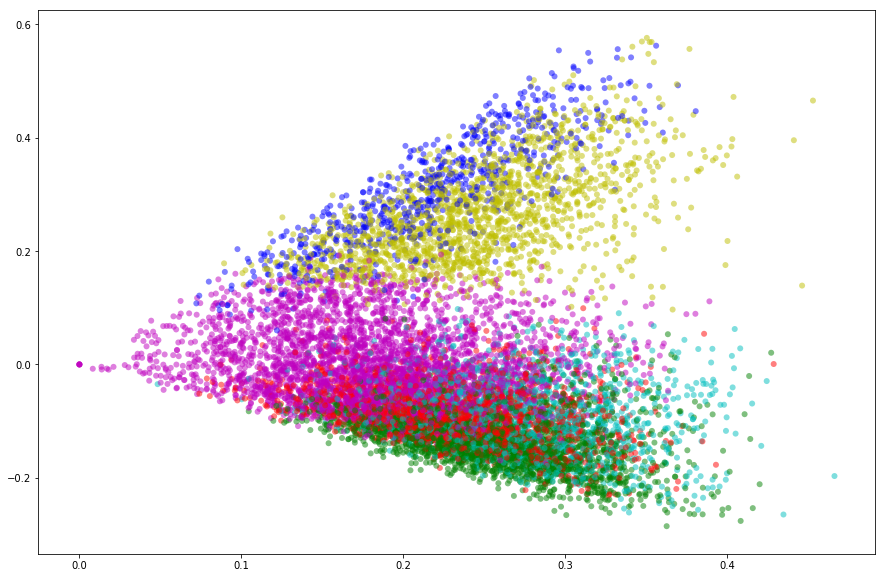

In [74]:
plt.figure(figsize=(15,10))
for index,row in df.iterrows():
    if row['cluster'] == 0:
        plt.scatter(row['pca1'], row['pca2'], c='b', marker="o",alpha=0.5, edgecolors='none',label='0')
    elif row['cluster'] == 1:
        plt.scatter(row['pca1'], row['pca2'], c='g', marker="o",alpha=0.5, edgecolors='none',label='1')
    elif row['cluster'] == 2:
        plt.scatter(row['pca1'], row['pca2'], c='r', marker="o",alpha=0.5, edgecolors='none',label='2')
    elif row['cluster'] == 3:
        plt.scatter(row['pca1'], row['pca2'], c='c', marker="o",alpha=0.5, edgecolors='none',label='3')
    elif row['cluster'] == 4:
        plt.scatter(row['pca1'], row['pca2'], c='y', marker="o",alpha=0.5, edgecolors='none',label='4')
    else:
        plt.scatter(row['pca1'], row['pca2'], c='m', marker="o",alpha=0.5, edgecolors='none',label='5')
plt.savefig('clusters.png')
plt.show()